In [30]:
# Import the libraries for the data quality step
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import Layout, FileUpload
from IPython.display import Markdown, display
import numpy as np
import math
import io
import os
import random
import datetime
import seaborn as sns
from IPython.display import clear_output
from pathlib import Path
import plotly.graph_objects as go

def printmd(string):
    display(Markdown(string))

# Data collection

### Direct upload

In [2]:
# ----- For testing purposes ------
file_path = "./Datasets/dementiadatacollectionoctober2014csv15kb.csv"
data = pd.read_csv(file_path)

### Use the upload button

In [149]:
# Shows the upload widget
upload = FileUpload(accept='.csv')
upload

FileUpload(value={}, accept='.csv', description='Upload')

In [150]:
try:
    uploaded_filename = next(iter(upload.value))
    content = upload.value[uploaded_filename]['content']
    data = pd.read_csv(io.BytesIO(content), header=0, escapechar='\\', encoding= 'unicode_escape')
except StopIteration:
    printmd("#### Please enter a valid file.**")

### Dataset preview 

In [151]:
data.head()

,Org name,Org code,Number of cases identified,Number of emergency admissions,Percentage of cases identified,Number of cases with diagnostic assessment,Number of cases with positive case finding question,Percentage of cases with diagnostic assessment,Number of cases referred,Number of cases with positive or inconclusive diagnostic assessment,Percentage of cases referred
0,AINTREE UNIVERSITY HOSPITAL NHS FOUNDATION TRUST,REM,302,369,82%,40,48,83%,8,8,100%
1,AIREDALE NHS FOUNDATION TRUST,RCF,229,253,91%,15,16,94%,5,5,100%
2,ASHFORD AND ST PETER'S HOSPITALS NHS FOUNDATIO...,RTK,374,382,98%,57,57,100%,57,57,100%
3,BARNSLEY HOSPITAL NHS FOUNDATION TRUST,RFF,242,253,96%,50,51,98%,6,6,100%
4,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,RDD,510,545,94%,510,545,94%,19,20,95%


# General dataset metadata

In [ ]:
print("\u0332".join("Descriptive metadata\n"))
filename, file_extension = os.path.splitext(file_path)
file_extension = file_extension.replace(".", "")
file_path_obj = Path(file_path)
last_modified = file_path_obj.stat().st_mtime

print("Format: {}".format(file_extension))
print("Size: {} elements".format(data.size))
print("Last modified: {}\n".format(datetime.datetime.fromtimestamp(last_modified)))


print("\u0332".join("Structural metadata\n"))
print("All column names: {}\n".format(list(data.columns)))
# data.isna().sum() is needed because the count function only returns the total number of non-na elements
print("Total number of values for each column: \n\n{} ".format(data.count() + data.isna().sum()))



# Values distribution for a specific column

In [ ]:
# Unique values for each column
df_features = pd.DataFrame(index = data.columns)
df_features['Total_Values'] = list(map(lambda x: data[x].count(), data.columns))
df_features['Unique_Values'] = list(map(lambda x: data[x].value_counts().count(), data.columns))
df_features['Most_Frequent_Value'] = list(map(lambda x: data[x].value_counts().sort_values(ascending = False).index[0], data.columns))
df_features['Most_Frequent_Value_Count'] = list(map(lambda x: data[x].value_counts().sort_values(ascending = False).iloc[0], data.columns))
df_features['Type_Data'] = list(map(lambda x: data[x].dtype, data.columns))

def compute_values_dist_column(column_name):
    plt.figure(figsize=(20,5))
    if df_features['Unique_Values'][column_name] > 100:
         fig = px.histogram(data, y=column_name,
                            color_discrete_sequence =['#d595e8'],
                            barmode="group",
                            title="Values distribution for column '{}'".format(column_name)).update_yaxes(categoryorder="total ascending")
    else:
         fig = px.histogram(data, y=column_name,
                            color_discrete_sequence =['#d595e8'],
                            barmode="group", 
                            title="Values distribution for column '{}'".format(column_name)).update_yaxes(categoryorder="total ascending")
    fig.show()

w = widgets.Dropdown(options = data.columns, description="Column: ", value = None)
def on_change(change):
    with outs:
        clear_output(wait=True)
        if change['type'] == 'change' and change['name'] == 'value':
            print(" ----- Values distribution histogram for %s -----" % change['new'])
            compute_values_dist_column(change['new'])

outs = widgets.Output()
w.observe(on_change, names='value')
display(w)
display(outs)

# Clean up
with outs:
    clear_output()


#  Unique values for a specific column

In [ ]:
def get_unique_values_count(req_data, req_column):
    return [req_data[req_column].value_counts().index.tolist(), req_data[req_column].value_counts()]


def unique_values_dist_column(unique_values, column_name):
    try:
        plt.figure(figsize=(40, 15))
    
        fig = go.Figure(data=[go.Table(
                header = dict(values=[column_name, "Number of appearances"],
                         fill_color='paleturquoise', align='center'),
                cells = dict(values = [unique_values[0], unique_values[1]],
                             font = dict(family="Times New Roman", size=14,)))])
        fig.update_layout(title_text="Unique values for column %s" % column_name,
                          title_font_size=24, title_x=0.5, autosize=True)
        fig.show()
    except KeyError:
        printmd("## Please select a column.")
    except IndexError:
        printmd("## Please select a column.")
        
def on_change(change):
    with outs:
        clear_output(wait=True)
        if change['type'] == 'change' and change['name'] == 'value':
            unique_values = get_unique_values_count(data, change['new'])
#             unique_values.iloc[:, ::-1]
            unique_values_dist_column(unique_values, change['new'])

outs = widgets.Output()
w = widgets.Dropdown(options = data.columns, description="Column: ", value = None)
w.observe(on_change, names='value')
display(w)
display(outs)

# Clean up
with outs:
    clear_output()

# Missing values analysis

Check for any missing value

In [139]:
# todo: adapt this method for when x is a series object
def check_missing_values(dfObj):
    resultDict = {}
    count = 0
    for elem in dfObj:
        if elem == 'NIL RETURN':
            resultDict[count] = True
        else:
            resultDict[count] = False
        count +=1
    return pd.Series(resultDict)

missing_values = pd.DataFrame()
missing_data = data.apply(lambda x: sum(check_missing_values(x)), axis=0).sort_values(ascending=False)
missing_values['missing_values_count'] = missing_data.values
missing_values['feature_name'] = missing_data.index
missing_values = missing_values[missing_values['missing_values_count'] != 0]

In [140]:
if missing_values.empty == True:
    print("There are no missing values in the data.")
else:
    printmd("## The missing values:")
    print(missing_values)

## The missing values:

   missing_values_count                                       feature_name
0                     4                       Percentage of cases referred
1                     4  Number of cases with positive or inconclusive ...
2                     4                           Number of cases referred
3                     4     Percentage of cases with diagnostic assessment
4                     4   Number of cases with positive case finding qu...
5                     4       Number of cases with diagnostic assessment  
6                     4                     Percentage of cases identified
7                     4                    Number of emergency admissions 
8                     4                        Number of cases identified 


In [ ]:
# to add further functionality

# Assessing the plausibility of the dataset

## Column similarity

### Heatmap for column similarity: 

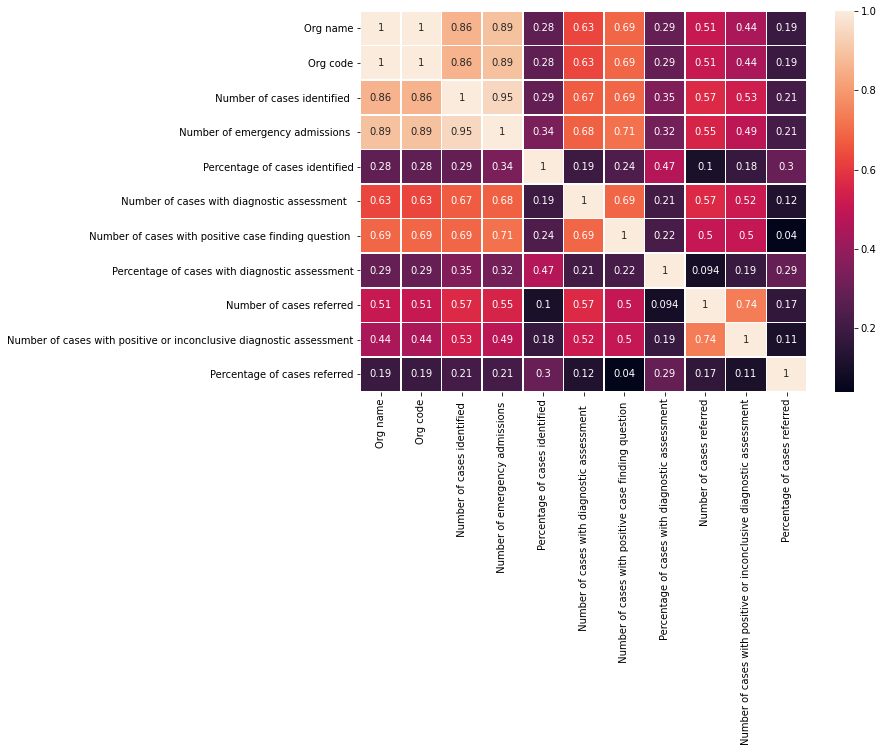

In [124]:
f, ax = plt.subplots(figsize=(10, 7))
try:
    printmd("### Heatmap for column similarity: ")
    df = data.apply(lambda x: x.factorize()[0]).corr() 
    sns.heatmap(df, annot=True, annot_kws={"size": 10}, linewidths=.5)
except ValueError:
    pass

### Similarity between missing values indexes

In [152]:
def has_null_value(data, null_list):
    null_elem = []
    for c in data.columns:
        for elem in data[c]:
            if elem in null_list:
                null_elem.append(elem)
    return null_elem

values = pd.Series()
for column in data.columns:
    values[column] = np.where(data[column].isnull() | data[column].isin(['NIL RETURN']))

missing_val_indexes = values.drop(values.index[[index for index, value in enumerate(values) if value[0].size == 0]])
print(missing_val_indexes)

df = pd.DataFrame(columns = missing_val_indexes.index, index =  missing_val_indexes.index)

for current_index_row in range(len(missing_val_indexes)):
    for current_index_column in range(len(missing_val_indexes)):
        df.iloc[current_index_row][current_index_column] = float(get_cosine_similarity(missing_val_indexes[current_index_row], missing_val_indexes[current_index_column]))
        
for column in df.columns:
    df[column] = df[column].astype('float')

printmd("## Similarity matrix for missing values indexes: ")    
display(df)


 Number of cases identified                                            ([5, 42, 110, 145, 147],)
 Number of emergency admissions                                             ([5, 42, 110, 147],)
Percentage of cases identified                                              ([5, 42, 110, 147],)
 Number of cases with diagnostic assessment                                 ([5, 42, 110, 147],)
 Number of cases with positive case finding question                        ([5, 42, 110, 147],)
Percentage of cases with diagnostic assessment                              ([5, 42, 110, 147],)
Number of cases referred                                                    ([5, 42, 110, 147],)
Number of cases with positive or inconclusive diagnostic assessment         ([5, 42, 110, 147],)
Percentage of cases referred                                                ([5, 42, 110, 147],)
dtype: object


<ipython-input-152-de3bf43dac59>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  values = pd.Series()


## Similarity matrix for missing values indexes: 

,Number of cases identified,Number of emergency admissions,Percentage of cases identified,Number of cases with diagnostic assessment,Number of cases with positive case finding question,Percentage of cases with diagnostic assessment,Number of cases referred,Number of cases with positive or inconclusive diagnostic assessment,Percentage of cases referred
Number of cases identified,1.000000,0.792482,0.792482,0.792482,0.792482,0.792482,0.792482,0.792482,0.792482
Number of emergency admissions,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Percentage of cases identified,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Number of cases with diagnostic assessment,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Number of cases with positive case finding question,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Percentage of cases with diagnostic assessment,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Number of cases referred,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Number of cases with positive or inconclusive diagnostic assessment,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Percentage of cases referred,0.792482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Heatmap for missing values similarity: 

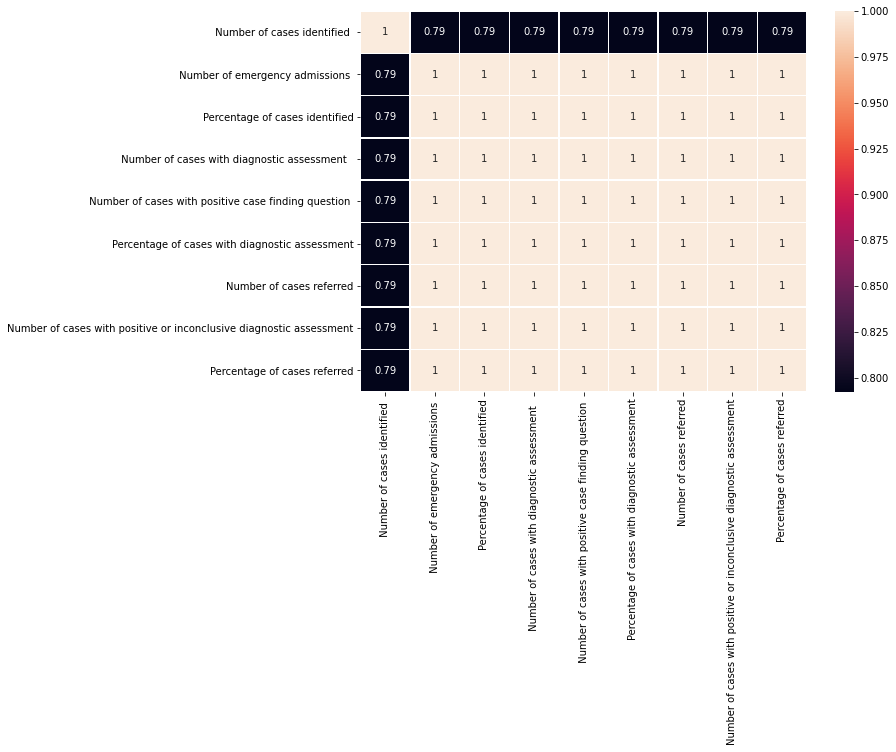

In [153]:
f, ax = plt.subplots(figsize=(10, 7))
try:
    printmd("## Heatmap for missing values similarity: ")
    sns.heatmap(df, annot=True, annot_kws={"size": 10}, linewidths=.5)
except ValueError:
    pass

In [ ]:
# Correlation test - determines the present and extent of a linear relationship between 2 quantitative variables
# the number of cases identified are closely related to the number of emergency admissions
# 
# This can be observed through the presence of the linear relationship between them.
#
# The data should be cleaned before doing the correlation test
def cleanNullTerms(d):
   return {
      k:v if v != 'NIL RETURN' and not pd.isnull(v) else '0'
      for k, v in d.items()
   }

cases = cleanNullTerms(data[' Number of cases identified '])
admissions = cleanNullTerms(data[' Number of emergency admissions '])

plt.scatter(cases.items(), admissions.items())
plt.show()